# Introduction
In this notebook, we try to build a model for customer segmentation and targeting.

We first develop a set of models and evaluate them on a performance metric and select the best model to validate our test set. 

In [1]:
# import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.style.use('ggplot')
sns.set_style('ticks')
from matplotlib import rcParams
rcParams['figure.figsize']= 10,5

pd.set_option('display.max_columns',60)

## Import Data

In [54]:
X_train= pd.read_csv('/Users/kavyaannapareddy/Desktop/kpmg/X_train.csv')
X_test= pd.read_csv('/Users/kavyaannapareddy/Desktop/kpmg/X_test.csv')
y_train = pd.read_csv('/Users/kavyaannapareddy/Desktop/kpmg/y_train.csv')
y_test_id= pd.read_csv('/Users/kavyaannapareddy/Desktop/kpmg/y_test_id.csv')

In [3]:
features=['gender', 'past_3_years_bike_related_purchases',
          'job_title','job_industry_category','wealth_segment',
          'deceased_indicator','owns_car','tenure','postcode',
          'property_valuation','age']
features_cat=['gender','job_title','job_industry_category',
             'wealth_segment','deceased_indicator','owns_car']
labels=['list_price']

In [4]:
X_train

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,property_valuation,age
0,0,93,71,3,2,0,1,10,7,9,48
1,1,81,19,2,2,0,1,15,109,9,21
2,0,97,38,0,0,0,1,7,14,11,29
3,1,58,106,5,2,0,0,7,719,3,7
4,1,38,58,2,1,0,1,7,559,5,47
...,...,...,...,...,...,...,...,...,...,...,...
2520,1,30,135,3,1,0,0,17,63,9,38
2521,1,72,5,0,1,0,0,0,22,9,3
2522,0,57,127,2,1,0,0,7,324,8,14
2523,1,99,63,5,2,0,1,18,125,8,16


In [6]:
X_train

,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,postcode,property_valuation,age
0,0,93,71,3,2,0,1,10,7,9,48
1,1,81,19,2,2,0,1,15,109,9,21
2,0,97,38,0,0,0,1,7,14,11,29
3,1,58,106,5,2,0,0,7,719,3,7
4,1,38,58,2,1,0,1,7,559,5,47
...,...,...,...,...,...,...,...,...,...,...,...
2520,1,30,135,3,1,0,0,17,63,9,38
2521,1,72,5,0,1,0,0,0,22,9,3
2522,0,57,127,2,1,0,0,7,324,8,14
2523,1,99,63,5,2,0,1,18,125,8,16


## Feature Scaling
We fit MinMaxScaler with range (0,1) on training set and apply the same transformation on testing set.

In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled= scaler.transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [10]:
y_train= np.array(y_train)

# Develop models and compare
We implement the following models and choose the best performing one.
1. Logistic Regression
2. Decision Tree/ Random Forest
3. Support Vector Machine
4. Linear Discriminant Analysis
5. K Nearest Neighbors
6. Naive Bayes

## Set performance metric

In our target variable, the positive class is rare and hence we prefer Precision-Recall curve in comparing performance of our classifiers. We choose F1 score, which is harmonic mean of precision and recall, to be our evaluation metric.

In [15]:
from sklearn.metrics import f1_score

## Split dataset

In [18]:
from sklearn.model_selection import train_test_split
X_train_split, X_valid_split, y_train_split, y_valid_split = train_test_split(X_train_scaled, y_train, random_state=42,  test_size=0.2)

## Apply Model

In [17]:
from sklearn.linear_model import LogisticRegression
clf= LogisticRegression(solver='liblinear', class_weight='balanced')
from sklearn.ensemble import RandomForestClassifier
rfc= RandomForestClassifier(n_estimators=200)
from sklearn.svm import SVC
svc= SVC()
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda= LinearDiscriminantAnalysis()
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
models= {'Logistic Regression':clf,'Random Forest':rfc,
         'Support Vector Machine': svc, 'Linear Discriminant Analysis':lda,
        'K Nearest Neighbors': knn,'Naive Bayes':gnb }

In [31]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
results=[]
for model in models:
    kfold= StratifiedKFold( n_splits=10, random_state=42, shuffle=True)
    score= cross_val_score(models[model], X_train_split, y_train_split, 
                           cv=kfold, scoring='f1')
    results.append(score)
    print('%s: %f, (%f)'%(model, np.mean(results), np.std(results)))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Logistic Regression: 0.098477, (0.018690)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Random Forest: 0.049238, (0.050981)


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Support Vector Machine: 0.032826, (0.047660)
Linear Discriminant Analysis: 0.024619, (0.043654)
K Nearest Neighbors: 0.022195, (0.042770)
Naive Bayes: 0.018496, (0.039910)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

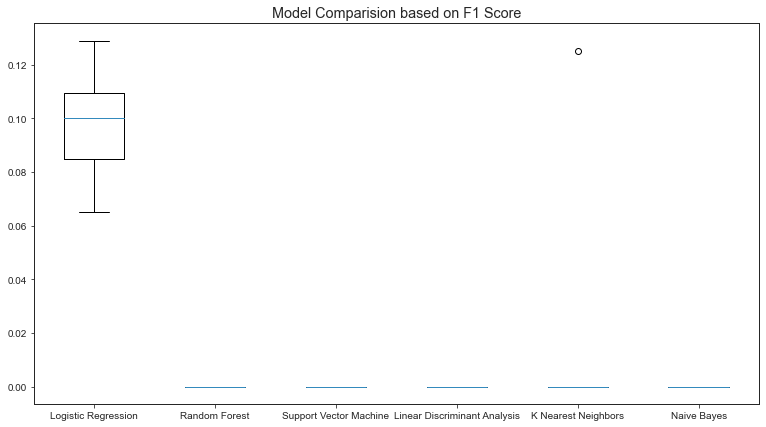

In [32]:
plt.figure(figsize= (13,7))
plt.title('Model Comparision based on F1 Score')
plt.boxplot(results, labels= models.keys())
plt.show()

In [34]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
results=[]
for model in models:
    kfold= StratifiedKFold( n_splits=10, random_state=42, shuffle=True)
    score= cross_val_score(models[model], X_train_split, y_train_split, 
                           cv=kfold, scoring='f1_weighted')
    results.append(score)
    print('%s: %f, (%f)'%(model, np.mean(results), np.std(results)))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Logistic Regression: 0.678273, (0.026975)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Random Forest: 0.797220, (0.120494)


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Support Vector Machine: 0.836869, (0.113258)
Linear Discriminant Analysis: 0.856694, (0.103937)
K Nearest Neighbors: 0.867689, (0.095547)
Naive Bayes: 0.875768, (0.089085)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

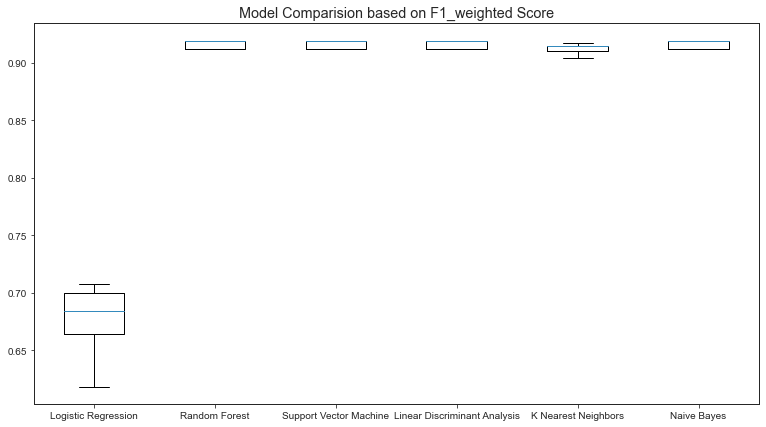

In [36]:
plt.figure(figsize= (13,7))
plt.title('Model Comparision based on F1_weighted Score')
plt.boxplot(results, labels= models.keys())
plt.show()

In [27]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
results=[]
for model in models:
    kfold= StratifiedKFold( n_splits=10, random_state=42, shuffle=True)
    score= cross_val_score(models[model], X_train_split, y_train_split, 
                           cv=kfold, scoring='roc_auc')
    results.append(score)
    print('%s: %f, (%f)'%(model, np.mean(results), np.std(results)))

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Logistic Regression: 0.487787, (0.053576)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 

Random Forest: 0.493002, (0.078019)


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

Support Vector Machine: 0.487135, (0.074213)
Linear Discriminant Analysis: 0.485923, (0.070714)
K Nearest Neighbors: 0.491651, (0.066859)
Naive Bayes: 0.493080, (0.067419)


/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:515: DataConversionWarning: A column-vector y was passed when

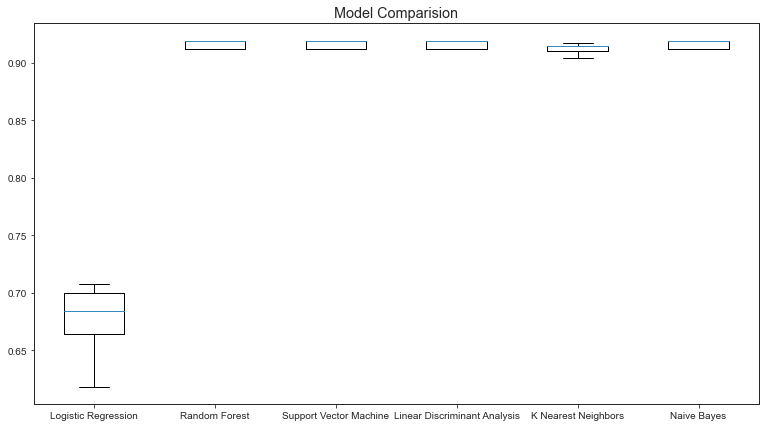

In [35]:
plt.figure(figsize= (13,7))
plt.title('Model Comparision based on ROC Curve')
plt.boxplot(results, labels= models.keys())
plt.show()

My target variable has highly imbalanced data and hence very difficult to get high recall on the rare class with reasonable precision. This explains the high weighted F1 score and roc_auc and very low F1 scores. 

Based on the three scoring methods, Logistic Regression seems to be doing the best. 

# Hyper-parameter Tuning

In [37]:
clf

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
from sklearn.model_selection import GridSearchCV
# defining parameter range
param_grid= {'C':[0.01,0.1,1,2], 'penalty':['l1','l2','elasticnet',None],
             'class_weight':['balanced'],
             'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid= GridSearchCV(clf, param_grid, cv=5, scoring='f1', refit=True, verbose= 3)

# fitting the model for grid search
grid.fit(X_train_split, y_train_split)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV] C=0.01, class_weight=balanced, penalty=l1, solver=newton-cg .....
[CV]  C=0.01, class_weight=balanced, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l1, solver=newton-cg .....
[CV]  C=0.01, class_weight=balanced, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l1, solver=newton-cg .....
[CV]  C=0.01, class_weight=balanced, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l1, solver=newton-cg .....
[CV]  C=0.01, class_weight=balanced, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l1, solver=newton-cg .....
[CV]  C=0.01, class_weight=balanced, penalty=l1, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l1, solver=lbfgs .........
[CV]  C=0.01, class_weight=balanced, penalty=l1, sol

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed w

[CV]  C=0.01, class_weight=balanced, penalty=l2, solver=sag, score=0.144, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l2, solver=sag ...........
[CV]  C=0.01, class_weight=balanced, penalty=l2, solver=sag, score=0.110, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l2, solver=sag ...........
[CV]  C=0.01, class_weight=balanced, penalty=l2, solver=sag, score=0.113, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l2, solver=saga ..........
[CV]  C=0.01, class_weight=balanced, penalty=l2, solver=saga, score=0.054, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l2, solver=saga ..........
[CV]  C=0.01, class_weight=balanced, penalty=l2, solver=saga, score=0.087, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l2, solver=saga ..........
[CV]  C=0.01, class_weight=balanced, penalty=l2, solver=saga, score=0.144, total=   0.0s
[CV] C=0.01, class_weight=balanced, penalty=l2, solver=saga ..........
[CV]  C=0.01, class_weight=balanced, penalt

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=0.1, class_weight=balanced, penalty=l1, solver=saga, score=0.103, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l1, solver=saga ...........
[CV]  C=0.1, class_weight=balanced, penalty=l1, solver=saga, score=0.106, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l1, solver=saga ...........
[CV]  C=0.1, class_weight=balanced, penalty=l1, solver=saga, score=0.120, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l1, solver=saga ...........
[CV]  C=0.1, class_weight=balanced, penalty=l1, solver=saga, score=0.073, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l1, solver=saga ...........
[CV]  C=0.1, class_weight=balanced, penalty=l1, solver=saga, score=0.075, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg ......
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg, score=0.053, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=newton-cg ......
[CV]  C=0.1, class_weight=balanced, penal

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs, score=0.127, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs ..........
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs, score=0.116, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs ..........
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=lbfgs, score=0.071, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=liblinear ......
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=liblinear, score=0.054, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=liblinear ......
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=liblinear, score=0.096, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=liblinear ......
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=liblinear, score=0.135, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=liblinear ......
[CV]  C=0.1, class_weight=ba

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/

[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=saga, score=0.127, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=saga ...........
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=saga, score=0.114, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=l2, solver=saga ...........
[CV]  C=0.1, class_weight=balanced, penalty=l2, solver=saga, score=0.071, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, class_weight=balanced, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, class_weight=balanced, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=elasticnet, solver=newton-cg 
[CV]  C=0.1, class_weight=balanced, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=0.1, class_weight=balanced, penalty=elasticnet, solver=newton-cg 
[CV] 

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/

[CV]  C=1, class_weight=balanced, penalty=l1, solver=saga, score=0.069, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l1, solver=saga .............
[CV]  C=1, class_weight=balanced, penalty=l1, solver=saga, score=0.104, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l1, solver=saga .............
[CV]  C=1, class_weight=balanced, penalty=l1, solver=saga, score=0.104, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l1, solver=saga .............
[CV]  C=1, class_weight=balanced, penalty=l1, solver=saga, score=0.122, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l1, solver=saga .............
[CV]  C=1, class_weight=balanced, penalty=l1, solver=saga, score=0.108, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=newton-cg ........
[CV]  C=1, class_weight=balanced, penalty=l2, solver=newton-cg, score=0.053, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=newton-cg ........


/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

[CV]  C=1, class_weight=balanced, penalty=l2, solver=newton-cg, score=0.086, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=newton-cg ........
[CV]  C=1, class_weight=balanced, penalty=l2, solver=newton-cg, score=0.127, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=newton-cg ........
[CV]  C=1, class_weight=balanced, penalty=l2, solver=newton-cg, score=0.112, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=newton-cg ........
[CV]  C=1, class_weight=balanced, penalty=l2, solver=newton-cg, score=0.071, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=lbfgs ............
[CV]  C=1, class_weight=balanced, penalty=l2, solver=lbfgs, score=0.053, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=lbfgs ............
[CV]  C=1, class_weight=balanced, penalty=l2, solver=lbfgs, score=0.086, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=lbfgs ............
[CV]  C=1, class_weight=balanced, pe

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validat

[CV]  C=1, class_weight=balanced, penalty=l2, solver=sag, score=0.000, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=sag ..............
[CV]  C=1, class_weight=balanced, penalty=l2, solver=sag, score=0.092, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=sag ..............
[CV]  C=1, class_weight=balanced, penalty=l2, solver=sag, score=0.112, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=sag ..............
[CV]  C=1, class_weight=balanced, penalty=l2, solver=sag, score=0.116, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=saga .............
[CV]  C=1, class_weight=balanced, penalty=l2, solver=saga, score=0.045, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=saga .............
[CV]  C=1, class_weight=balanced, penalty=l2, solver=saga, score=0.081, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=saga .............


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/

[CV]  C=1, class_weight=balanced, penalty=l2, solver=saga, score=0.128, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=saga .............
[CV]  C=1, class_weight=balanced, penalty=l2, solver=saga, score=0.112, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=l2, solver=saga .............
[CV]  C=1, class_weight=balanced, penalty=l2, solver=saga, score=0.048, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=balanced, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=balanced, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=balanced, penalty=elasticnet, solver=newton-cg, score=nan, total=   0.0s
[CV] C=1, class_weight=balanced, penalty=elasticnet, solver=newton-cg 
[CV]  C=1, class_weight=b

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Valu

[CV]  C=2, class_weight=balanced, penalty=l1, solver=liblinear, score=0.062, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l1, solver=sag ..............
[CV]  C=2, class_weight=balanced, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l1, solver=sag ..............
[CV]  C=2, class_weight=balanced, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l1, solver=sag ..............
[CV]  C=2, class_weight=balanced, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l1, solver=sag ..............
[CV]  C=2, class_weight=balanced, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l1, solver=sag ..............
[CV]  C=2, class_weight=balanced, penalty=l1, solver=sag, score=nan, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l1, solver=saga .............
[CV]  C=2, class_weight=balanced, penalty=l1, solver=saga, score=0.0

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/loc

[CV]  C=2, class_weight=balanced, penalty=l2, solver=newton-cg, score=0.086, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l2, solver=newton-cg ........
[CV]  C=2, class_weight=balanced, penalty=l2, solver=newton-cg, score=0.126, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l2, solver=newton-cg ........
[CV]  C=2, class_weight=balanced, penalty=l2, solver=newton-cg, score=0.112, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l2, solver=newton-cg ........
[CV]  C=2, class_weight=balanced, penalty=l2, solver=newton-cg, score=0.070, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l2, solver=lbfgs ............
[CV]  C=2, class_weight=balanced, penalty=l2, solver=lbfgs, score=0.053, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l2, solver=lbfgs ............
[CV]  C=2, class_weight=balanced, penalty=l2, solver=lbfgs, score=0.086, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l2, solver=lbfgs ............
[CV]  C=2, class_weight=balanced, pe

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/

[CV]  C=2, class_weight=balanced, penalty=l2, solver=sag, score=0.099, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l2, solver=sag ..............
[CV]  C=2, class_weight=balanced, penalty=l2, solver=sag, score=0.110, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l2, solver=sag ..............
[CV]  C=2, class_weight=balanced, penalty=l2, solver=sag, score=0.087, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l2, solver=saga .............
[CV]  C=2, class_weight=balanced, penalty=l2, solver=saga, score=0.076, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l2, solver=saga .............
[CV]  C=2, class_weight=balanced, penalty=l2, solver=saga, score=0.000, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l2, solver=saga .............
[CV]  C=2, class_weight=balanced, penalty=l2, solver=saga, score=0.131, total=   0.0s
[CV] C=2, class_weight=balanced, penalty=l2, solver=saga .............
[CV]  C=2, class_weight=balanced, penalty=l2, solver=saga, sc

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/model_selecti

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight='balanced',
                                          dual=False, fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 2], 'class_weight': ['balanced'],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=

In [43]:
print(grid.best_params_)

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}


In [46]:
grid_pred= grid.predict(X_valid_split)

# print classification report
from sklearn.metrics import classification_report, accuracy_score
classification_report(grid_pred, y_valid_split)

'              precision    recall  f1-score   support\n\n           0       0.57      0.93      0.71       288\n           1       0.47      0.08      0.13       217\n\n    accuracy                           0.57       505\n   macro avg       0.52      0.51      0.42       505\nweighted avg       0.53      0.57      0.46       505\n'

                   precision    recall  f1-score   support
    0                  0.57      0.93      0.71       288    
    1                  0.47      0.08      0.13       217 
    accuracy                               0.57       505
    macro avg          0.52      0.51      0.42       505
    weighted avg       0.53      0.57      0.46       505

In [47]:
accuracy_score(grid_pred, y_valid_split)

0.5663366336633663

# Predict Values

In [49]:
clf_best = LogisticRegression(C= 0.01, class_weight= 'balanced', penalty= 'l2', solver= 'newton-cg')

In [51]:
clf_best.fit(X_train, y_train)
y_pred= clf_best.predict(X_test)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
y_pred_df = pd.DataFrame(y_pred).replace({1:'Y',0: 'N'})
y_pred_df= y_pred_df.rename(columns={0:'Top_Customer'})

In [59]:
predict= pd.concat([y_test_id,y_pred_df], axis=1)
predict_top_customer= predict[predict['Top_Customer']=='Y']

In [60]:
predict_top_customer.to_csv('New_target_customer_list.csv')

# Conclusion
We found a list of 356 customers to target. Since our customers are geographically divided, it is best to target New South Wales , followed by Victoria and Queensland.